In [31]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


## Vaccination Rate Per State


In [32]:
df = pd.read_csv("C:/Users/Marquis Sills/Desktop/DataBootCamp/project_1/data-table.csv")


In [33]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.

bottom_vaccine = df.sort_values("people_fully_vaccinated %", ascending=True)
vaccine_low=bottom_vaccine.head(10)
low_vac=vaccine_low[['State Name','people_fully_vaccinated %','% deaths in 2021']]
low_vac 

,State Name,people_fully_vaccinated %,% deaths in 2021
11,Idaho,0.426030,0.001241
0,Alabama,0.460230,0.001870
49,Wyoming,0.473091,0.001765
23,Mississippi,0.486558,0.001729
9,Georgia,0.496962,0.001451
41,Tennessee,0.497415,0.001689
3,Arkansas,0.507451,0.001556
17,Louisiana,0.509028,0.001379
13,Indiana,0.512333,0.001253
33,North Dakota,0.513936,0.000819


In [34]:
top_vaccine = df.sort_values("people_fully_vaccinated %", ascending=False)
high_vaccine=top_vaccine.head(10) 
high_vac=high_vaccine[['State Name','people_fully_vaccinated %','% deaths in 2021']]
high_vac

,State Name,people_fully_vaccinated %,% deaths in 2021
44,Vermont,0.746333,0.000403
38,Rhode Island,0.740498,0.000895
20,Massachusetts,0.736196,0.000697
18,Maine,0.735710,0.000961
6,Connecticut,0.733502,0.000751
31,New York,0.709543,0.001102
19,Maryland,0.690404,0.000853
29,New Jersey,0.676039,0.000909
45,Virginia,0.667949,0.001035
46,Washington,0.664252,0.000700


{'whiskers': [<matplotlib.lines.Line2D object at 0x00000222EBEEBAC0>, <matplotlib.lines.Line2D object at 0x00000222EBEEBD60>, <matplotlib.lines.Line2D object at 0x00000222EBEFDD60>, <matplotlib.lines.Line2D object at 0x00000222EBF0B040>], 'caps': [<matplotlib.lines.Line2D object at 0x00000222EBEFD040>, <matplotlib.lines.Line2D object at 0x00000222EBEFD2E0>, <matplotlib.lines.Line2D object at 0x00000222EBF0B2E0>, <matplotlib.lines.Line2D object at 0x00000222EBF0B580>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000222EBEEB820>, <matplotlib.lines.Line2D object at 0x00000222EBEFDAC0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000222EBEFD580>, <matplotlib.lines.Line2D object at 0x00000222EBF0B820>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000222EBEFD820>, <matplotlib.lines.Line2D object at 0x00000222EBF0BAC0>], 'means': []}


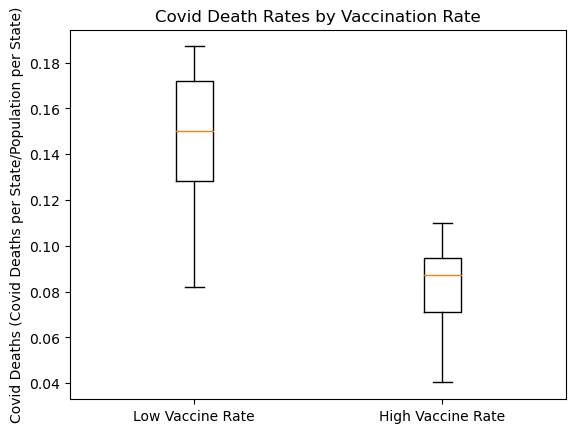

In [35]:
vaccination_rate = [low_vac['% deaths in 2021']*100,high_vac['% deaths in 2021']*100]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Covid Deaths (Covid Deaths per State/Population per State)')
labels = ['Low Vaccine Rate','High Vaccine Rate']
plt.title("Covid Death Rates by Vaccination Rate")

print(ax1.boxplot(vaccination_rate,labels = labels,flierprops={'markerfacecolor': 'red', 'marker': 'o','markersize': 10}))

In [36]:
mean_numpy = np.mean(low_vac['% deaths in 2021']*100)
print(f"The mean covid death rates for low vaccination rates are {mean_numpy}")

median_numpy = np.median(low_vac['% deaths in 2021']*100)
print(f"The median covid death rates for low vaccination rates are {median_numpy}")

standard_deviation_numpy = np.std(low_vac['% deaths in 2021']*100)
print(f"The standard deviation of covid deaths for low vaccination are {standard_deviation_numpy}")

The mean covid death rates for low vaccination rates are 0.14752017
The median covid death rates for low vaccination rates are 0.15034714999999998
The standard deviation of covid deaths for low vaccination are 0.03002158417545783


In [37]:
mean_numpy = np.mean(high_vac['% deaths in 2021']*100)
print(f"The mean covid death rates for high vaccination rates are {mean_numpy}")

median_numpy = np.median(high_vac['% deaths in 2021']*100)
print(f"The median covid death rates for high vaccination rates are {median_numpy}")

standard_deviation_numpy = np.std(high_vac['% deaths in 2021']*100)
print(f"The standard deviation of covid deaths for high vaccination are {standard_deviation_numpy}")

The mean covid death rates for high vaccination rates are 0.08305801
The median covid death rates for high vaccination rates are 0.08738505
The standard deviation of covid deaths for high vaccination are 0.019155192188879233


In [38]:
print(f" Normal test Low Vaccine Rate {st.normaltest(low_vac['% deaths in 2021']*100)}")
print(f" Normal test High Vaccine Rate {st.normaltest(high_vac['% deaths in 2021']*100)}")


 Normal test Low Vaccine Rate NormaltestResult(statistic=2.043852034656131, pvalue=0.3599010964618845)
 Normal test High Vaccine Rate NormaltestResult(statistic=2.569687014562735, pvalue=0.27669388082167634)


c:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(high_vac['% deaths in 2021']*100, low_vac['% deaths in 2021']*100, equal_var=False)

Ttest_indResult(statistic=-5.43036897816297, pvalue=6.513600168732206e-05)